# Embodied cognition on Wikipedia: a data analysis
In what follows, an analysis of the page edits and views count for the _"Embodied cogtnition"_ article on Wikipedia is done. The data is provided by the WikipediaStatistics at en.wikipedia.org

### Load data

In [69]:
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 22})
import seaborn as sns
import numpy as np
import datetime

df_views_count = pd.read_csv('Data/wikishark_ec_page_views.csv', delimiter=",", header=0, index_col=False)
df_views_count_update = pd.read_csv('Data/wikishark_ec_page_views_updated.csv', delimiter=",", header=0, index_col=False)
df_edits_count = pd.read_csv('Data/wikishark_ec_edits_count2.csv', delimiter=",", header=0, index_col=False)

df_views_count

,DateTime,Embodied cognition[en],Cognitive science[en],Cognition[en]
0,2008-01-01 00:00:00,12,426,612
1,2008-01-02 00:00:00,4,600,1147
2,2008-01-03 00:00:00,4,641,1256
3,2008-01-04 00:00:00,14,627,1197
4,2008-01-05 00:00:00,7,521,864
...,...,...,...,...
5185,2022-03-13 00:00:00,156,224,395
5186,2022-03-14 00:00:00,196,318,561
5187,2022-03-15 00:00:00,186,293,574
5188,2022-03-16 00:00:00,242,320,442


In [70]:
# Converting date to a datestamp type
df_views_count["DateTime"] = pd.to_datetime(df_views_count["DateTime"])
df_views_count_update["DateTime"] = pd.to_datetime(df_views_count_update["DateTime"])
df_edits_count["DateTime"] = pd.to_datetime(df_edits_count["DateTime"])

### 1. Data  preprocessing

In [3]:
# Check for missing values
print(df_edits_count.isnull().sum())
#
# Setting DateTime as index from csv files
df_views_count = df_views_count.set_index("DateTime")
df_views_count_update = df_views_count_update.set_index("DateTime")
df_edits_count = df_edits_count.set_index("DateTime")

df_views_count

DateTime          0
Edits             0
IPs               0
IPs               0
Minor edits       0
Minor edits       0
Size            208
dtype: int64


,Embodied cognition[en],Cognitive science[en],Cognition[en]
DateTime,,,
2008-01-01,12,426,612
2008-01-02,4,600,1147
2008-01-03,4,641,1256
2008-01-04,14,627,1197
2008-01-05,7,521,864
...,...,...,...
2022-03-13,156,224,395
2022-03-14,196,318,561
2022-03-15,186,293,574


### 1. Edits count

In [4]:
df_edits_count = df_edits_count.fillna(0).astype(int)
df_edits_count

,Edits,IPs,IPs,Minor edits,Minor edits,Size
DateTime,,,,,,
2002-04-01,7,6,85,2,28,492
2002-05-01,0,0,0,0,0,0
2002-06-01,0,0,0,0,0,0
2002-07-01,0,0,0,0,0,0
2002-08-01,0,0,0,0,0,0
...,...,...,...,...,...,...
2021-11-01,19,2,10,2,10,0
2021-12-01,53,1,1,17,32,0
2022-01-01,87,0,0,31,35,166875


In [5]:
# Select the edits per year and month
edits_year = df_edits_count.index.year
print(edits_year)

Int64Index([2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2004,
            ...
            2021, 2021, 2021, 2021, 2021, 2021, 2021, 2022, 2022, 2022],
           dtype='int64', name='DateTime', length=228)


In [6]:
# Sum per year
edit_sum_year = df_edits_count["Edits"].groupby(edits_year).sum()
minor_sum_year = df_edits_count["Minor edits"].groupby(edits_year).sum()
editors_sum_year = df_edits_count["IPs"].groupby(edits_year).sum()
size_year = df_edits_count["Size"].groupby(edits_year).sum()

edit_sum_year  = pd.DataFrame(edit_sum_year)
edit_sum_year["Minor edits"] = pd.DataFrame(minor_sum_year)
edit_sum_year["Editors"] = pd.DataFrame(editors_sum_year)
edit_sum_year['Size'] = pd.DataFrame(size_year)
edit_sum_year2 = edit_sum_year.reset_index()
edit_sum_year2

,DateTime,Edits,Minor edits,Editors,Size
0,2002,8,2,6,492
1,2004,32,16,11,5566
2,2005,16,3,9,5782
3,2006,17,6,5,6699
4,2007,16,7,4,6896
5,2008,42,27,2,16678
6,2009,38,17,9,14475
7,2010,30,12,7,21183
8,2011,203,28,33,54061
9,2012,55,18,1,55732


In [7]:
def plot_edits_size(df, save=True):
    fig, ax1 = plt.subplots(figsize=(20, 16))
    ax2 = ax1.twinx()
    width = 0.82

    edit_sum_year2[['Edits','Minor edits','Editors']].plot(kind='bar',width=width, ax=ax1)
    edit_sum_year2[['Size']].plot(secondary_y = True, ax=ax2, color='red', marker='o')
    ax1.set_ylabel('Edits count')
    ax1.set_xlabel('Year', labelpad=10)
    ax1.set_title("Article's edits count and size per year")
    # ax1.xticks(rotation = 45)

    ax1 = plt.gca()
    # make secondary y-axis (right) start from same zero value as left y-axis
    ax1.set_ylim(bottom=0)

    ax1.set_xticklabels(edit_sum_year2.DateTime.tolist())

    # Save image high resolution image
    # Uncomment to save image
    # format can include # e.g .png, .svg, etc.
    if save:
        plt.savefig("Images/edits_count_and_size.eps", format='eps', dpi=1200)
    plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


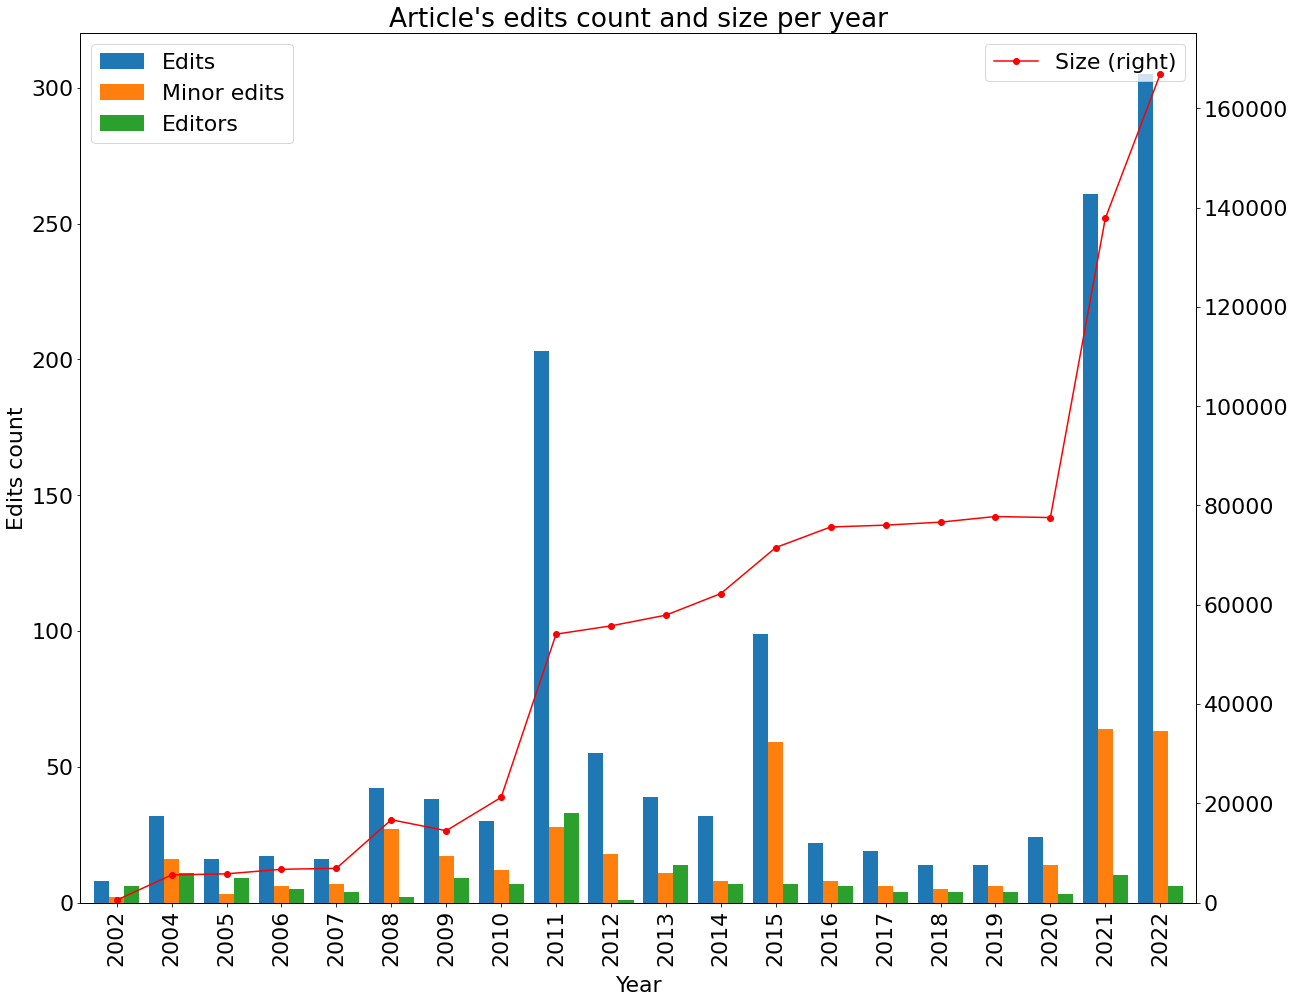

In [8]:
plot_edits_size(edit_sum_year2, save=True)

### 2. Views count

In [9]:
df_views_count
df_views_count_update

,Embodied cognition[en],Cognitive science[en],Mind[en],Cognition[en]
DateTime,,,,
2008-01-01,12,426,439,612
2008-01-02,4,600,660,1147
2008-01-03,4,641,663,1256
2008-01-04,14,627,672,1197
2008-01-05,7,521,535,864
...,...,...,...,...
2022-06-21,194,301,644,392
2022-06-22,175,303,610,422
2022-06-23,142,297,611,505


In [10]:
# df_month = df_views_count.index.month
# df_year = df_views_count.index.year

In [11]:
def group_moth_year(df):
    # select month and year of the data
    df_month = df.index.month
    df_year = df.index.year
    return df_month, df_year

In [12]:
moth_view, year_view = group_moth_year(df_views_count)
moth_view_update, year_view_update = group_moth_year(df_views_count_update)

In [13]:
# Moving averages per year (52 weeks window) --old csv--
views_mean = df_views_count.groupby(year_view).mean()
views_mean = pd.DataFrame(views_mean)

# Moving averages per year (52 weeks window) --new csv--
views_mean_update = df_views_count_update.groupby(year_view_update).mean()
views_mean_update = pd.DataFrame(views_mean_update)
views_mean

,Embodied cognition[en],Cognitive science[en],Cognition[en]
DateTime,,,
2008,28.273224,707.030055,1773.275956
2009,88.493151,720.761644,2059.112329
2010,160.838356,899.821918,2512.279452
2011,192.575342,911.956164,2469.772603
2012,259.724044,903.693989,2680.142077
2013,294.917808,863.526027,2918.660274
2014,299.682192,856.465753,1893.200000
2015,265.745205,670.997260,1502.635616
2016,236.120219,591.953552,1096.346995


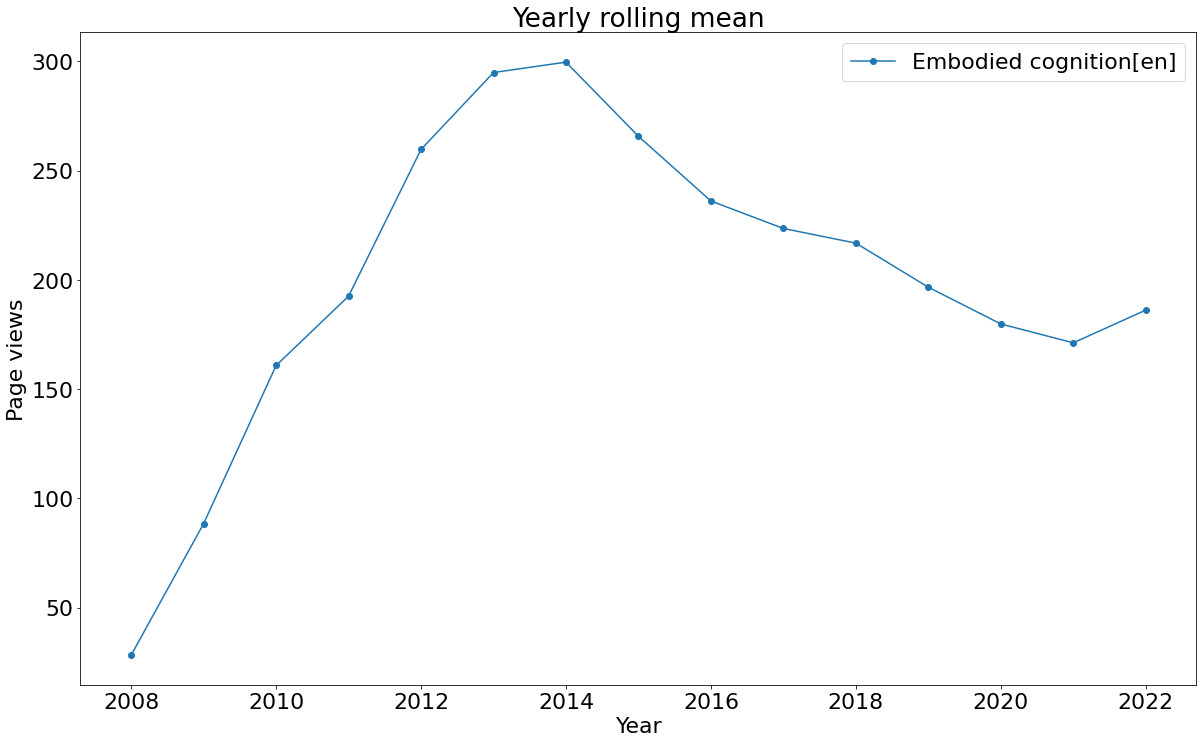

In [66]:

# visualize_date(views_mean, (8,5), "line", None, "blue", "Date", "Page views", "Mean views per year", "eps", "Images/views_year.eps")
fig, ax = plt.subplots(figsize=(20,12))
views_mean[['Embodied cognition[en]']].plot(ax=ax, marker='o')
# views_mean_update.plot(ax=ax, marker='o')
ax.set_xlabel("Year")
ax.set_ylabel("Page views")
ax.set_title("Yearly rolling mean")
plt.show()

In [72]:
views_before_project = df_views_count_update['2020-04-01':'2021-03-31']
views_during_project = df_views_count_update['2021-04-01':'2022-03-31']

views_during_project

TypeError: cannot do slice indexing on RangeIndex with these indexers [2020-04-01] of type str

In [65]:
views_during_project['Year'] = views_during_project.index.year

views_during_project

,Embodied cognition[en],Cognitive science[en],Mind[en],Cognition[en],Year
DateTime,,,,,


<AxesSubplot:xlabel='Year', ylabel='Embodied cognition[en]'>

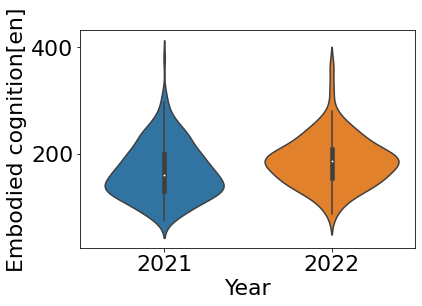

In [52]:
sns.violinplot(x='Year', y='Embodied cognition[en]',data=views_during_project)

In [26]:
views_average_1_year = views_before_project.index.year

views_during_project_mean = views_during_project['Embodied cognition[en]'].groupby(views_average_1_year).mean()
# v2 = views_during_project['Embodied cognition[en]'].groupby(views_average_1_year)
# v2.plot(kind='box')
v3 = pd.DataFrame(views_during_project_mean)

In [27]:
v4 = v3.reset_index()
v4

,DateTime,Embodied cognition[en]
0,2020,166.629091
1,2021,186.200000


<AxesSubplot:xlabel='DateTime', ylabel='Embodied cognition[en]'>

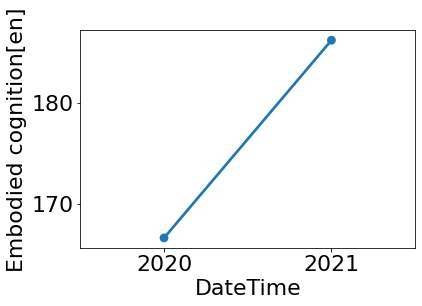

In [28]:
sns.pointplot(x='DateTime', y='Embodied cognition[en]',data=v4)

In [ ]:
views_average_1 = df_views_count['2008-03-01':'2020-02-28']

views_average_1
views_average_1_month = views_average_1.index.month
#
#
views_average_1 = views_average_1['Embodied cognition[en]'].groupby(views_average_1_month).mean()


# views_during_project
views_before_project_month = views_before_project.index.month
views_during_project_month = views_during_project.index.month

# # views_during_project.tail(50)
#

In [ ]:
views_during_project_mean = views_during_project['Embodied cognition[en]'].groupby(views_during_project_month).mean()
views_before_project_mean = views_before_project['Embodied cognition[en]'].groupby(views_before_project_month).mean()
views_cogsci_project_mean = views_during_project['Cognitive science[en]'].groupby(views_during_project_month).sum()
views_during_project_mean

In [ ]:
views_before_project_mean

In [ ]:
views_during_mean_update = pd.DataFrame()
views_during_mean_update['Before'] = pd.DataFrame(views_before_project_mean)
views_during_mean_update['During'] = pd.DataFrame(views_during_project_mean)
views_during_mean_update

In [ ]:
fig, ax = plt.subplots(figsize=(20,12))
views_during_mean_update.plot(ax=ax, marker='o')
# views_mean_update.plot(ax=ax, marker='o')
ax.set_xlabel("Year")
ax.set_ylabel("Page views")
ax.set_title("Yearly rolling mean")
plt.show()

In [ ]:

mean_view_average_before = views_before_project_mean / views_average_1
mean_view_average_after = views_during_project_mean / views_average_1

# Without normalizing
mean_view = pd.DataFrame()
mean_view['Before'] = pd.DataFrame(views_before_project_mean)
mean_view['After'] = pd.DataFrame(views_during_project_mean)
# mean_view['CogSci'] = pd.DataFrame(views_cogsci_project_mean)
# mean_view
# mean_view.describe()

# Normalizing the data
mean_view_averaged = pd.DataFrame()
mean_view_averaged['Before'] = pd.DataFrame(mean_view_average_before)
mean_view_averaged['After'] = pd.DataFrame(mean_view_average_after)

mean_view_averaged.describe()

In [ ]:
# fig, ax  = plt.subplots()

ax = mean_view.plot(kind='box')
# ax = mean_view.plot()
ax.set_xlabel("Date")
ax.set_ylabel("Page views")
ax.set_title("monthly rolling count")

plt.show()

In [ ]:
views_before_project_mean = views_before_project['Embodied cognition[en]'].groupby(views_before_project_month)

ax = mean_view_averaged.plot()
ax.set_xlabel("Date")
ax.set_ylabel("Page views")
ax.set_title("Previous monthly rolling mean")

plt.show()